In [102]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('./dark.rc')
# plt.style.use('dark_background')
# plt.rcParams['figure.facecolor'] = (1,1,1,0)
# plt.rcParams['axes.facecolor'] = (1,1,1,0)
# plt.rcParams['savefig.facecolor'] = (1,1,1,0)
# # mpl.rcParams['font.size'] = 14
# # mpl.rcParams['axes.labelsize'] = 14
# # mpl.rcParams['xtick.labelsize'] = 12
# # mpl.rcParams['ytick.labelsize'] = 12
# plt.rcParams['legend.frameon'] = False
# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'
# plt.rcParams['xtick.top'] = True
# plt.rcParams['ytick.right'] = True
# plt.rcParams['axes.labelpad'] = 2.0
# plt.rcParams['axes.axisbelow'] = True
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import data_tools as dt
import os

In [68]:
K_B = 8.6173303e-5 # mV/mK

def g_cb(V, temp, V0, alpha):
    arg = alpha*(V-V0)/(K_B*temp)
    return (alpha/(K_B*temp))*np.power(np.cosh(arg), -2.0)

def dg_cb(V, temp, V0, alpha, dS):
    arg = alpha*(V-V0)/(K_B*temp)
    first = (2*alpha/(K_B*temp))*(arg - (1/2)*dS)*np.tanh(arg)*np.power(np.cosh(arg),-2.0)
    second = -1.0*(alpha/(K_B*temp))*np.power(np.cosh(arg),-2.0)
    return first+second

In [69]:
MU_B = 5.7883818012e-5 # eV/T
K_B = 8.6173303e-5 # eV/K

ALPHA1_CLSD = 0.0469
ALPHA1_OPN = 0.0295
G1_OPN = 0.388
ALPHA2_CLSD = 0.0442
ALPHA2_OPN = 0.0333
G2_OPN = 0.400
ALPHA3_CLSD = 0.0415
ALPHA3_OPN = 0.0265
G3_OPN = 0.395

In [70]:
# directories

fig_dir = os.path.join('/Users/nik/Dropbox/Repos/stanford_03-18/figures/')
data_dir = os.path.join('/Users/nik/Dropbox/Repos/spin_entropy/raw_data/')
analysis_dir = os.path.join('/Users/nik/Dropbox/Repos/spin_entropy/analysis/')

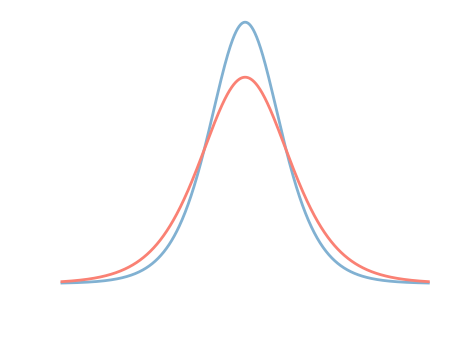

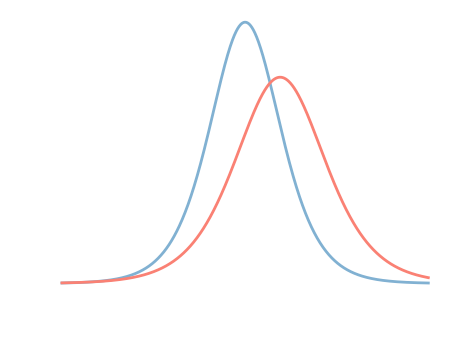

In [304]:
fig1, ax1 = plt.subplots(1,1)

V0 = -500 #mV
temp = 150 #mK
dT = 40
alpha = 0.05
V = np.linspace(-501,-499,1000)

### no shift ###
g_c = g_cb(V, temp, V0, alpha)
g_h = g_cb(V, temp+dT, V0, alpha)
g0 = g_c.max()
ax1.plot(V, g_c/g0, c='C4')
ax1.plot(V, g_h/g0, c='C3')
with plt.rc_context({"text.usetex": True}):
    ax1.text(0.02, 0.8, r'$\delta S/k_B = 0$', 
                    transform=ax2.transAxes)

ax1.set_ylabel(r'$g_{SET}$')
ax1.set_xlabel(r'$V_{g}$')
ax1.set_xticklabels([]);
ax1.set_yticklabels([]);

### shift ###
fig2, ax2 = plt.subplots(1,1)

g_c = g_cb(V, temp, V0, alpha)
dV = 2*K_B*dT*2*np.log(2)/alpha
g_h = g_cb(V, temp+dT, V0+dV, alpha)
g0 = g_c.max()
ax2.plot(V, g_c/g0, c='C4')
ax2.plot(V, g_h/g0, c='C3')
with plt.rc_context({"text.usetex": True}):
    ax2.text(0.02, 0.8, r'$\delta S/k_B = -2 \ln{2}$', 
                    transform=ax2.transAxes)

ax2.set_ylabel(r'$g_{SET}$')
ax2.set_xlabel(r'$V_{g}$')
    
ax2.set_xticklabels([]);
ax2.set_yticklabels([]);

fig1.savefig(os.path.join(fig_dir,'SET-g_1.svg'))
fig2.savefig(os.path.join(fig_dir,'SET-g_2.svg'))

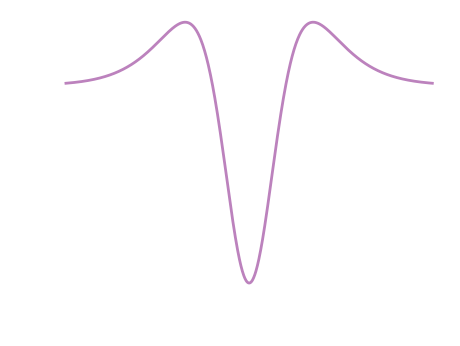

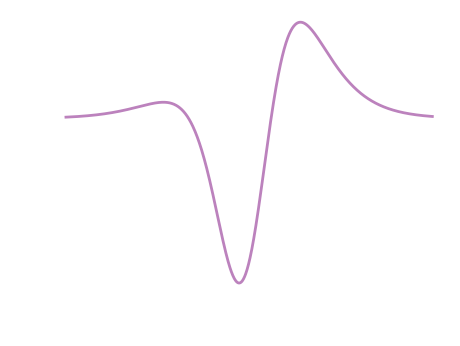

In [302]:
fig1, ax1 = plt.subplots(1,1)

V0 = -500 #mV
temp = 150 #mK
alpha = 0.05
V = np.linspace(-501,-499,1000)
g = g_cb(V, temp, V0, alpha)
g0 = g.max()
# ax.plot(V, g/g0, c='g')

### no shift ###
dg_z = dg_cb(V, temp, V0, alpha, 0)
dg0 = dg_z.max()
ax1.plot(V, dg_z/dg0, c='C7', label='$dS/k_B = 0$')

ax1.set_ylabel(r'$\delta g_{SET}$')
ax1.set_xlabel(r'$V_{g}$')
ax1.set_xticklabels([]);
ax1.set_yticklabels([]);

### shift ###
fig2, ax2 = plt.subplots(1,1)

dg_n = dg_cb(V, temp, V0, alpha, -2*np.log(2))
ax2.plot(V, dg_n/dg0, c='C7', label='$dS/k_B = -2 \ln{2}$')

ax2.set_ylabel(r'$\delta g_{SET}$')
ax2.set_xlabel(r'$V_{g}$')
ax2.set_xticklabels([]);
ax2.set_yticklabels([]);

fig1.savefig(os.path.join(fig_dir,'SET-dg_1.svg'))
fig2.savefig(os.path.join(fig_dir,'SET-dg_2.svg'))

/usr/local/lib/python3.6/site-packages/matplotlib/mathtext.py:838: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)
/usr/local/lib/python3.6/site-packages/matplotlib/mathtext.py:838: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


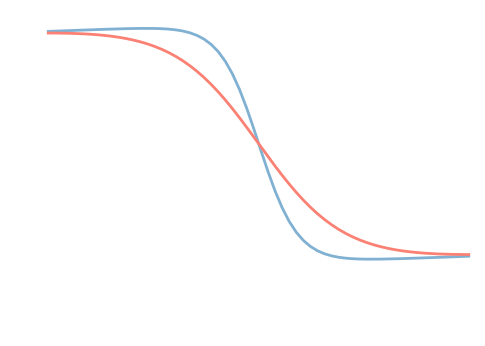

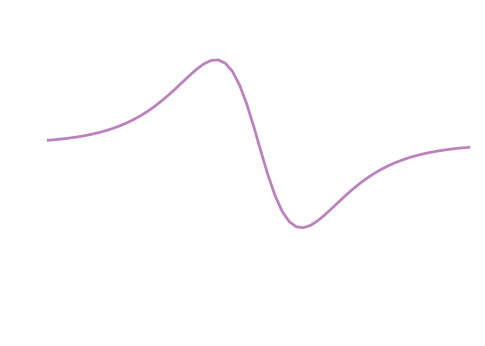

In [307]:
fig1, ax1 = plt.subplots(1,1)
fig2, ax2 = plt.subplots(1,1)

V0 = -485.0 # mV
dV0 = 0.0 # mV
theta1 = 0.275 # mV
theta2 = 0.600 # mV

xnew = np.linspace(-500,-450, 500)
g1 = dt.i_sense(xnew, V0, theta1, 0.045, 10e-4, 0.5)
g2 = dt.i_sense(xnew, V0+dV0, theta2, 0.045, 10e-4, 0.5)
ax1.plot(xnew, g1, c='C4')
ax1.plot(xnew, g2, c='C3')
ax1.fill_between(xnew, g1, g2, facecolor='w', alpha=0.2)
ax1.vlines(V0, 0, 0.5, color='w', linestyle=":")
ax1.hlines(0.5, -500, V0, color='w', linestyle=":")

ax1.set_xticks([V0])
ax1.set_xticklabels([r'V$_{mid}$'], rotation=50)
    
ax1.set_ylim(0.45,0.55)
ax1.set_xlim(-488,-482)
ax1.set_yticklabels([])
ax1.tick_params(axis='x', top=False)
ax1.tick_params(axis='x', direction='out')
ax1.tick_params(axis='y', right=False)
ax1.set_xlabel(r'V$_{p}$', x=0.95, labelpad=-25)
ax1.text(0.15, 0.35, r'$N-1$', transform=ax1.transAxes, fontstyle='italic')
ax1.text(0.75, 0.35, r'$N$', transform=ax1.transAxes, fontstyle='italic')
ax1.set_ylabel(r'G$_{sens}$')

ax2.plot(xnew, -1.0*(g2-g1), c='C7')
ax2.fill_between(xnew, 0.0, -1.0*(g2-g1), facecolor='w', alpha=0.2)
ax2.vlines(V0, -0.05, 0.0, color='w', linestyle=":")
ax2.hlines(0.0, -500, -470, color='w', linestyle=":")
ax2.set_xticks([V0])

ax2.set_ylim(-0.024,0.024)
ax2.set_xlim(-488,-482)
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.tick_params(axis='x', top=False)
ax2.tick_params(axis='x', direction='out')
ax2.tick_params(axis='y', right=False)
ax2.set_xlabel(r'V$_{p}$', x=0.95, labelpad=-25)
ax2.set_ylabel(r'$\delta G_{sens}$')
ax2.set_xticklabels([r'V$_{mid}$'], rotation=50)

with plt.rc_context({"text.usetex": True}):
    ax1.text(0.54, 0.75, r'$\Delta S_{N-1 \rightarrow N} = 0$', 
             fontsize=22, transform=ax1.transAxes)
ax2.text(0.5, 0.8, r'ANTISYMMETRIC', transform=ax2.transAxes)

fig1.tight_layout()
fig1.savefig(os.path.join(fig_dir, 'g_fake_zero-dS.svg'), bbox_inches='tight')
fig2.tight_layout()
fig2.savefig(os.path.join(fig_dir, 'dg_fake_zero-dS.svg'), bbox_inches='tight')

/usr/local/lib/python3.6/site-packages/matplotlib/mathtext.py:838: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)
/usr/local/lib/python3.6/site-packages/matplotlib/mathtext.py:838: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


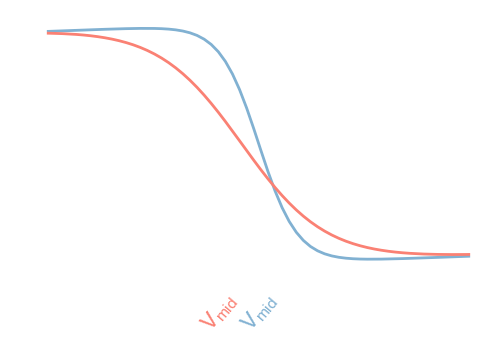

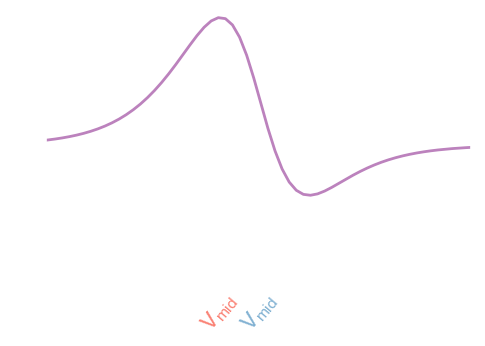

In [119]:
fig1, ax1 = plt.subplots(1,1)
fig2, ax2 = plt.subplots(1,1)

V0 = -485.0 # mV
dV0 = -1.6*150/1000 # -1.6uV/mK*100mK in mV
theta1 = 0.275 # mV
theta2 = 0.600 # mV

xnew = np.linspace(-500,-450, 500)
g1 = dt.i_sense(xnew, V0, theta1, 0.045, 10e-4, 0.5)
g2 = dt.i_sense(xnew, V0+dV0, theta2, 0.045, 10e-4, 0.5)
ax1.plot(xnew, g1, c='C4')
ax1.plot(xnew, g2, c='C3')
ax1.fill_between(xnew, g1, g2, facecolor='w', alpha=0.2)
ax1.vlines(V0, 0, 0.5, color='w', linestyle=":")
ax1.vlines(V0+dV0, 0, 0.5, color='w', linestyle=":")
ax1.hlines(0.5, -500, V0, color='w', linestyle=":")
    
ax1.set_ylim(0.45,0.55)
ax1.set_xlim(-488,-482)
ax1.set_yticklabels([])
ax1.tick_params(axis='x', top=False)
ax1.tick_params(axis='x', direction='out')
ax1.tick_params(axis='y', right=False)
ax1.set_xlabel(r'V$_{p}$', x=0.95, labelpad=-25)
ax1.text(0.15, 0.35, r'$N-1$', transform=ax1.transAxes, fontstyle='italic')
ax1.text(0.75, 0.35, r'$N$', transform=ax1.transAxes, fontstyle='italic')
ax1.set_ylabel(r'G$_{sens}$')

ax2.plot(xnew, -1.0*(g2-g1), c='C7')
ax2.fill_between(xnew, 0.0, -1.0*(g2-g1), facecolor='w', alpha=0.2)
ax2.vlines(V0, -0.05, 0.0, color='w', linestyle=":")
ax2.vlines(V0+dV0, -0.05, 0.0, color='w', linestyle=":")
ax2.hlines(0.0, -500, -470, color='w', linestyle=":")

ax2.set_ylim(-0.024,0.024)
ax2.set_xlim(-488,-482)
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.tick_params(axis='x', top=False)
ax2.tick_params(axis='x', direction='out')
ax2.tick_params(axis='y', right=False)
ax2.set_xlabel(r'V$_{p}$', x=0.95, labelpad=-25)
ax2.set_ylabel(r'$\delta G_{sens}$')

for a in [ax1, ax2]:
    a.set_xticks([V0+dV0, V0])
    a.set_xticklabels([r'V$_{mid}$', r'V$_{mid}$'], rotation=50)
    colors = ['C3', 'C4']
    aligns = ['right', 'center']
    for xtick, color, align in zip(a.get_xticklabels(), colors, aligns):
        xtick.set_color(color)
        xtick.set_horizontalalignment(align)

with plt.rc_context({"text.usetex": True}):
    ax1.text(0.52, 0.75, r'$\Delta S_{N-1 \rightarrow N} > 0$', 
                transform=ax1.transAxes, fontsize=22)
ax2.text(0.52, 0.8, r'ASYMMETRIC', 
                transform=ax2.transAxes)
fig1.tight_layout()
fig1.savefig(os.path.join(fig_dir, 'g_fake_non-zero-dS.svg'), bbox_inches='tight')
fig2.tight_layout()
fig2.savefig(os.path.join(fig_dir, 'dg_fake_non-zero-dS.svg'), bbox_inches='tight')

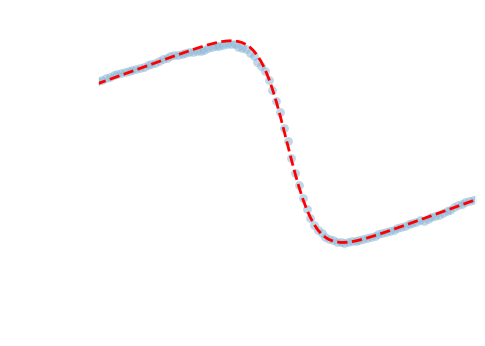

In [118]:
fig, ax0 = plt.subplots(1,1)

#################
### g vs gate ###
#################

swp = dt.open_hdf5(944, path=data_dir) # load sweep data
x, z = dt.moving_avg(0.5*swp['x_array'][:], swp['i_sense_dc2d'][:]*1e9, 8, axis=1)
i_results = pd.read_csv(os.path.join(analysis_dir, 'dat944_i_results.csv'))

x20 = i_results.loc[20,'x0']
ax0.scatter(x-x20, z[20]*(1e-9)/(35e-3*1e-2)/(3.874e-5), 
            marker='o', color='C4', alpha=0.5, s=40, lw=0)

ax0.plot(x-x20, dt.i_sense(x, 
                        *i_results.iloc[20,:-3].values)*(1e-9)/(35e-3*1e-2)/(3.874e-5), 
         c='red', ls='--')

ax0.set_xlim(-2.5,2.5)
ax0.set_xticks([-2,0,2])
ax0.set_ylim(0.445, 0.505)
ax0.set_ylabel(r'G$_{sens}$ $(e^2/h)$')
ax0.set_xlabel(r'$V_{p} - V_{mid}$ (mV)')

ax0.grid()

# add N
ax0.text(0.15, 0.45, r'$N=0$', transform=ax0.transAxes, fontstyle='italic')
ax0.text(0.65, 0.45, r'$N=1$', transform=ax0.transAxes, fontstyle='italic')

fig.tight_layout()
fig.savefig(os.path.join(fig_dir, 'single_sensor_fit.svg'), bbox_inches='tight')

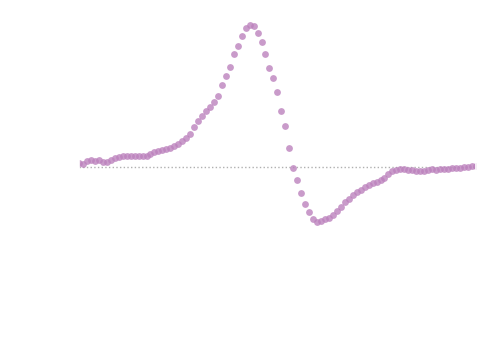

In [124]:
fig, ax1 = plt.subplots(1,1)

swp = dt.open_hdf5(945, path=data_dir) 
x, z = dt.moving_avg(0.5*swp['x_array'][:], swp['g5x2d'][:], 4, axis=1)
z = z*(1e-8)*(1e9) # nA

di_free = pd.read_csv(os.path.join(analysis_dir, 'dat945_di_free_fits.csv'))
di_zero = pd.read_csv(os.path.join(analysis_dir, 'dat945_di_zero_fits.csv'))

ax1.axhline(y=0, lw=1, c='#b0b0b0', ls=':', zorder=1)
ax1.scatter(x-di_free.loc[8,'x0'], z[8]*(1e-6)/(35e-3*1e-2)/(3.874e-5), 
                marker='o', color='C7', lw=0, alpha=0.8, s=24, zorder=2)
ax1.fill_between(x-di_free.loc[8,'x0'], np.zeros(len(x)), z[8]*(1e-6)/(35e-3*1e-2)/(3.874e-5), 
                 facecolor='w', alpha=0.2)

ax1.set_xlim(-2.5,2.5)
ax1.set_xticks([-2,0,2])
ax1.set_xlabel('$V_{p}-V_{mid}$ (mV)')
ax1.set_ylabel('$\delta G_{sens}$ $(10^{-3} \, e^2/h)$')
ax1.set_ylim(-2.25, 3.25)

ax1.text(0.52, 0.8, '$I_{heat} = 8\,$nA RMS', 
             transform=ax1.transAxes)

# add N
ax1.text(0.1, 0.15, r'$N=0$', transform=ax1.transAxes, fontstyle='italic')
ax1.text(0.75, 0.15, r'$N=1$', transform=ax1.transAxes, fontstyle='italic')

fig.tight_layout()
fig.savefig(os.path.join(fig_dir, 'single_dg_no-fit.svg'), bbox_inches='tight')

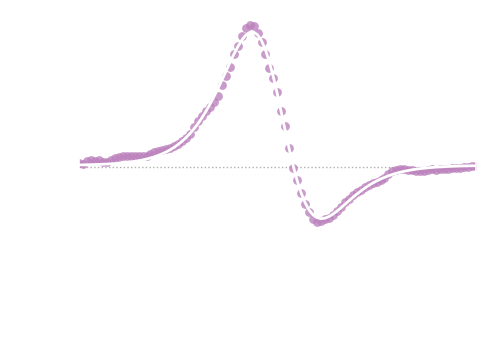

In [160]:
fig, ax1 = plt.subplots(1,1)

swp = dt.open_hdf5(945, path=data_dir) 
x, z = dt.moving_avg(0.5*swp['x_array'][:], swp['g5x2d'][:], 4, axis=1)
z = z*(1e-8)*(1e9) # nA

di_free = pd.read_csv(os.path.join(analysis_dir, 'dat945_di_free_fits.csv'))
di_zero = pd.read_csv(os.path.join(analysis_dir, 'dat945_di_zero_fits.csv'))

ax1.axhline(y=0, lw=1, c='#b0b0b0', ls=':', zorder=1)
ax1.scatter(x-di_free.loc[8,'x0'], z[8]*(1e-6)/(35e-3*1e-2)/(3.874e-5), 
                marker='o', color='C7', lw=0, alpha=0.8, s=40, zorder=2)

ax1.plot(x-di_free.loc[8,'x0'], 
         (1e-6)*dt.di_sense_simple(x, 
                                *di_free.iloc[8,5:].values)/(35e-3*1e-2)/(3.874e-5), 
         c='w', ls='-', label=r'$\Delta S/k_B = {0:.2f}$'.format(-1.0*di_free.loc[8,'epsilon']), 
         zorder=4)
# ax1.plot(x-di_zero.loc[8,'x0'], 
#              (1e-6)*dt.di_sense_simple(x, 
#                                 *di_zero.iloc[8,5:].values)/(35e-3*1e-2)/(3.874e-5), 
#                  c='k', ls='--', label=r'$\Delta S/k_B = 0$', zorder=3)

ax1.legend(loc='upper right')

ax1.set_xlim(-2.5,2.5)
ax1.set_xticks([-2,0,2])
ax1.set_xlabel('$V_{p}-V_{mid}$ (mV)')
ax1.set_ylabel('$\delta G_{sens}$ $(10^{-3} \, e^2/h)$')
ax1.set_ylim(-2.25, 3.25)


# add N
ax1.text(0.1, 0.15, r'$N=0$', transform=ax1.transAxes, fontstyle='italic')
ax1.text(0.75, 0.15, r'$N=1$', transform=ax1.transAxes, fontstyle='italic')

fig.tight_layout()
fig.savefig(os.path.join(fig_dir, 'single_dg_fit.svg'), bbox_inches='tight')

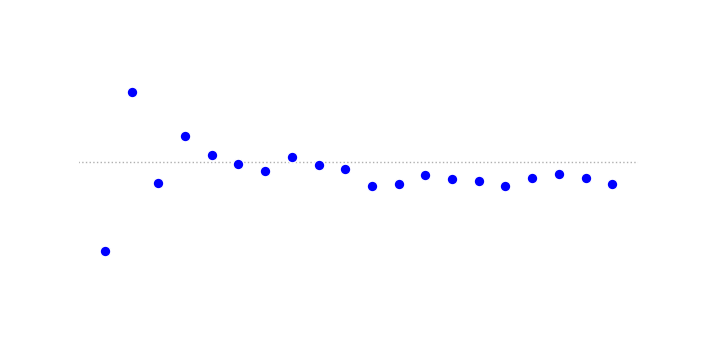

In [147]:
fig, ax4 = plt.subplots(1,1, figsize=(7.6,3.8))

di_results = pd.read_csv(os.path.join(analysis_dir, 'dat945_di_free_fits.csv'))
ax4.axhline(y=1*np.log(2), c='#b0b0b0', ls=':', lw=1, zorder=1)
ax4.scatter(di_results['i_heat'][1:], -1.0*di_results['epsilon'][1:], s=60,
            marker='o', facecolor='b', edgecolor='w', zorder=2)

eps_err = np.loadtxt(os.path.join(analysis_dir,'dat945_di_free_eps-err.csv'),
                  delimiter=",")
yerr = -1.0*(eps_err - di_results['epsilon'][:,None])
yerr[:, 0], yerr[:, 1] = yerr[:, 1], yerr[:, 0].copy()
yerr = abs(yerr.transpose())
ax4.errorbar(di_results['i_heat'][1:], -1.0*di_results['epsilon'][1:],
             yerr=yerr[:,1:], fmt='none', ecolor='w',
             capsize=2, zorder=-1)

ax4.set_ylim(0.3, np.log(2)*1.5)
ax4.set_yticks([0.4, np.log(2), 0.9])
ax4.set_yticklabels(['0.4', '$\ln{2}$', '0.9'])
ax4.set_ylabel('$\Delta S/k_B$')

ax4.set_xlim(0,21)
ax4.set_xticks([0,5,10,15,20])
ax4.set_xlabel('I$_{heat}$ (nA RMS)')

# add dT axis
ax4a = ax4.twiny()
popt_pwr = np.loadtxt(os.path.join(analysis_dir, 'dat944_PtoTheta_fit.csv'), 
                      delimiter=',')

dTs = [0, 30, 60, 90, 120] 
Ts = [di_results['t_calc'][0] + d for d in dTs] # T_{electron} corresponding to dT
thetas = [K_B*t/ALPHA1_CLSD for t in Ts] # theta corresponding to dT
pwrs = [((t/popt_pwr[0])**2 - 1)/popt_pwr[1] for t in thetas]
pwrs[0] = 0
popt_v = np.loadtxt(os.path.join(analysis_dir, 'dat945_voltage_fit.csv'), delimiter=',')
currents = [np.sqrt(1000*p/popt_v[0]) for p in pwrs]
currents[0] = 0 # small correction, must be true

ax4a.set_xlim(ax4.get_xlim())
ax4a.set_xticks(currents)
ax4a.set_xticklabels(dTs)
ax4a.set_xlabel(r'$\delta T$ (mK)')

# add dV/dT axis
ax4b = ax4.twinx()
dVdT = [-0.8e-3, -1.2e-3, -1.6e-3]
dS = [-1.0*ALPHA1_CLSD*v/K_B for v in dVdT]

ax4b.set_ylim(ax4.get_ylim())
ax4b.set_yticks(dS)
ax4b.set_yticklabels(['-0.8', '-1.2', '-1.6'])
ax4b.set_ylabel(r'$\partial V_{mid} / \partial T$ $(\mu V / mK)$', 
                rotation=-90, va='bottom')

fig.tight_layout()
fig.savefig(os.path.join(fig_dir, 'dS-vs-dT.svg'), bbox_inches='tight')

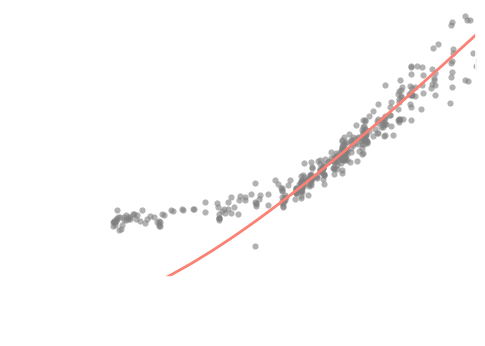

In [155]:
fig, ax2 = plt.subplots(1,1)

datafiles = ['lever-arm_peak1_dataset_{0:d}.csv'.format(i+1) for i in range(3)]
df = pd.concat((pd.read_csv(os.path.join(analysis_dir,f)) for f in datafiles), 
                   ignore_index=True)
df.sort_values(by='Tmc', ascending=True, inplace=True)

ax2.scatter(df['Tmc'], df['theta'], 
                marker='o', color='gray', lw=0, alpha=0.6, s=20)

tnew  = np.loadtxt(os.path.join(analysis_dir,'peak1_alpha-fit_temps.csv'),delimiter=",")
thetas = np.loadtxt(os.path.join(analysis_dir,'peak1_alpha-fit_thetas.csv'),delimiter=",")
ax2.plot(tnew, thetas, c='C3')

ax2.set_yscale('log')
ax2.set_ylim(0.1, 2.0)
ax2.set_yticks([1])
ax2.set_yticklabels(['1'])
ax2.set_ylabel(r'$k_B T / \alpha$ (mV)')

ax2.set_xscale('log')
ax2.set_xlim(10, 800)
ax2.set_xticks([10, 100])
ax2.set_xticklabels(['10', '100'])
ax2.set_xlabel('T$_{MC}$ (mK)')

ax2.text(0.05, 0.8, r'$\alpha$ = {0:.3f} meV/mV'.format(ALPHA1_CLSD), 
         transform=ax2.transAxes);
ax2.text(0.65, 0.1, r'$I_{heat}=0$ nA', 
         transform=ax2.transAxes);

fig.tight_layout()
fig.savefig(os.path.join(fig_dir, 'alpha-cal.svg'), bbox_inches='tight')

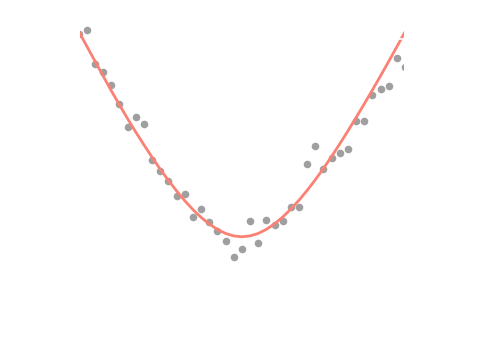

In [159]:
fig, ax3 = plt.subplots(1,1)

i_results = pd.read_csv(os.path.join(analysis_dir, 'dat944_i_results.csv'))
ax3.scatter(i_results['i_heat'], i_results['theta'], 
           marker='o', alpha=0.75, color='gray', lw=0, s=30)

ax3.set_xlim(-20,20)
ax3.set_xlabel(r'$I_{heat}$ (nA DC)')
ax3.set_ylabel(r'$k_B T / \alpha$ (mV)')

theta_calc = np.loadtxt(os.path.join(analysis_dir, 'dat944_theta_calc.csv'), 
                        delimiter=',')
ax3.plot(i_results['i_heat'], theta_calc, c='C3')

# add T axis
ax3a = ax3.twinx()
Ts = [100, 150, 200, 250]
popt_pwr = np.loadtxt(os.path.join(analysis_dir, 'dat944_PtoTheta_fit.csv'), 
                      delimiter=',')
T_min = (ALPHA1_CLSD*popt_pwr[0]/(K_B))
thetas = [K_B*T/ALPHA1_CLSD for T in Ts]

ax3a.set_ylim(ax3.get_ylim())
ax3a.set_yticks(thetas)
ax3a.set_yticklabels(['100', '150', '200', '250'])
ax3a.set_ylabel(r'T (mK)', rotation=-90, va='bottom')

ax3.text(0.15,0.8, "$T = a \sqrt{T^2_{MC} + b I_{heat}^2 R}$", 
            transform=ax3.transAxes)

fig.tight_layout()
fig.savefig(os.path.join(fig_dir, 'dT-cal.svg'), bbox_inches='tight')

/usr/local/lib/python3.6/site-packages/matplotlib/mathtext.py:838: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


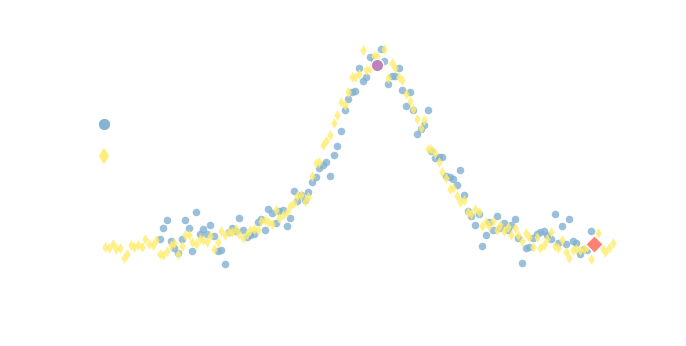

In [311]:
fig, ax2 = plt.subplots(1,1, figsize=(7.2,3.8))

### plot 01 data ###
df = pd.read_csv(os.path.join(analysis_dir, 'dat1011_di_free_fits.csv'))
ax2.scatter(df['field'], -1.0*df['epsilon'], s=30,
               marker='o', color='C4', lw=0, alpha=0.8, zorder=2)


### plot 23 data ###
df = pd.read_csv(os.path.join(analysis_dir, 'dat1442_di_free_fits.csv'))
ax2.scatter(df['field'], -1.0*df['epsilon'], s=30,
               marker='d', color='C9', lw=0, alpha=0.8, zorder=2)

ax2.axhline(y=np.log(2), c='w', ls=':', lw=0.8, zorder=1)
ax2.axhline(y=0, c='w', ls=':', lw=0.8, zorder=1)

ax2.set_xlim(-5.5, 5.5)
ax2.set_ylim(-0.1, 0.85)

scatter_01 = mpl.lines.Line2D([], [], ls='', 
                               marker='o', color='C4', alpha=0.8, 
                               markeredgewidth=0, markersize=8, 
                               label=r'$0 \rightarrow 1$')

scatter_23 = mpl.lines.Line2D([], [], ls='', 
                               marker='d', color='C9', alpha=0.8, 
                               markeredgewidth=0, markersize=8, 
                               label=r'$2 \rightarrow 3$')

handles = [scatter_01, scatter_23]
labels = [h.get_label() for h in handles] 
legend_data = ax2.legend(handles, labels, loc='center left')
ax2.add_artist(legend_data)

ax2.set_ylabel('$\Delta S/k_B$')
ax2.set_yticks([0.0, 0.4, np.log(2)])
ax2.set_yticklabels(['0.0', '0.4', r'$\ln{2}$'])
ax2.set_xlabel('B$_{\parallel}$ (T)')

### markers ###
df = pd.read_csv(os.path.join(analysis_dir, 'dat1011_di_free_fits.csv'))
ax2.scatter(df.loc[60,'field'], -1.0*df.loc[60,'epsilon'], marker='o', s=81, zorder=4, 
            facecolors='C7', edgecolors='w')
ax2.scatter(df.loc[120,'field'], -1.0*df.loc[120,'epsilon'], marker='D', s=81, zorder=4, 
            facecolors='C3', edgecolors='w')

fig.tight_layout()
fig.savefig(os.path.join(fig_dir, 'one-three_no-fits.svg'), bbox_inches='tight')

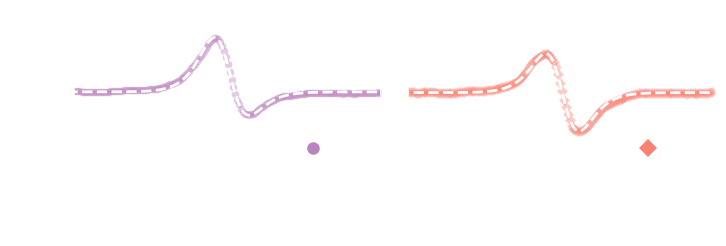

In [314]:
fig, (ax3, ax4) = plt.subplots(1,2, figsize = (7.6, 2.8))

swp = dt.open_hdf5(1011, path=data_dir) # load sweep data
vy = swp['y_array'][:]/1000.0
vx, vz = dt.moving_avg(swp['x_array'][:]*0.5, swp['g5x2d'][:]*2e-8, 8, axis=1)
vz = vz*(1e3)/(35e-3*1e-2)/(3.874e-5) # 0.001e^2/h

ax3.scatter(vx-df.iloc[60,0], vz[60]/np.abs(vz[60]).max(), 
            marker='o', s=30, c='C7', lw=0, alpha=0.4)
di_fit = dt.di_sense_simple(vx, *df.iloc[60,:-1].values)
line0, = ax3.plot(vx-df.iloc[60,0], di_fit/np.abs(di_fit).max(), 
         c='w', ls='--')
ax3.text(0.98, 0.80, r'$\Delta S/k_B={0:.2f}$'.format(-1.0*df['epsilon'][60]), 
         transform=ax3.transAxes, ha='right')
line0T = mpl.lines.Line2D([], [], color='w', ls='--',
                              marker = 'o', markerfacecolor='C7', markeredgecolor='w', 
                              markeredgewidth=0, markersize = 9, label='0T')
handles = [line0T]
labels = [h.get_label() for h in handles] 
ax3.legend(handles=handles, labels=labels, loc='lower right', 
           handlelength=2)

ax4.scatter(vx-df.iloc[120,0], vz[120]/np.abs(vz[120]).max()/np.sqrt(2), 
            marker='D', s=30, c='C3', lw=0, alpha=0.4)
di_fit = dt.di_sense_simple(vx, *df.iloc[120,:-1].values)
ax4.plot(vx-df.iloc[120,0], di_fit/np.abs(di_fit).max()/np.sqrt(2), c='w', ls='--')
ax4.text(0.97, 0.80, r'$\Delta S/k_B={0:.2f}$'.format(-1.0*df['epsilon'][120]), 
         transform=ax4.transAxes, ha='right')
line4T = mpl.lines.Line2D([], [], color='w', ls='--', 
                              marker = 'D', markerfacecolor='C3', markeredgecolor='w', 
                              markeredgewidth=0, markersize = 9, label='4T')
handles = [line4T]
labels = [h.get_label() for h in handles] 
ax4.legend(handles=handles, labels=labels, loc='lower right',
           handlelength=2)

for a in[ax3, ax4]:
    a.set_xlim(-4,4)
    a.set_xticks([-2,0,2])
    a.set_ylim(-1.5, 1.5)
    a.set_yticks([-1, 0, 1])
    a.grid(ls=':')
    a.set_xlabel(r'$V_{p}-V_{mid}$ (mV)')

ax4.set_yticklabels([])
ax3.set_ylabel('$\delta G_{sens}$ (arb)')

fig.tight_layout()
fig.savefig(os.path.join(fig_dir, 'dG-cuts_01.svg'), bbox_inches='tight')

/usr/local/lib/python3.6/site-packages/matplotlib/mathtext.py:838: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


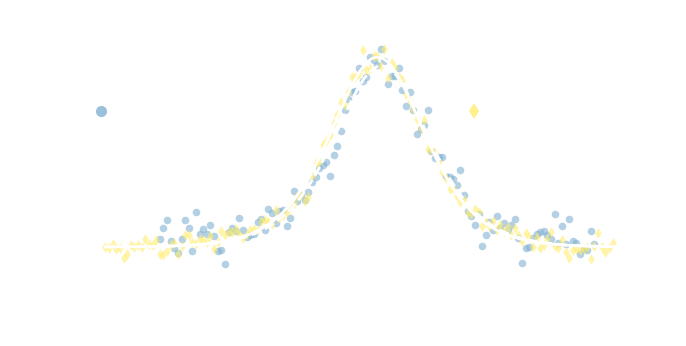

In [230]:
fig, ax2 = plt.subplots(1,1, figsize=(7.2,3.8))

### plot 01 data ###
df = pd.read_csv(os.path.join(analysis_dir, 'dat1011_di_free_fits.csv'))
ax2.scatter(df['field'], -1.0*df['epsilon'], s=30,
               marker='o', color='C4', lw=0, alpha=0.6, zorder=2)

field = np.loadtxt(os.path.join(analysis_dir, 'dat1011_field.csv'))
dS = np.loadtxt(os.path.join(analysis_dir, 'dat1011_dS01_fit.csv'))
ax2.plot(field, dS, c='w', ls='--', zorder=3)

## plot 23 data ###
df = pd.read_csv(os.path.join(analysis_dir, 'dat1442_di_free_fits.csv'))
ax2.scatter(df['field'], -1.0*df['epsilon'], s=30,
               marker='d', color='C9', lw=0, alpha=0.6, zorder=2)

field = np.loadtxt(os.path.join(analysis_dir, 'dat1442_field.csv'))
dS = np.loadtxt(os.path.join(analysis_dir, 'dat1442_dS23_fit.csv'))
ax2.plot(field, dS, c='w', ls='-', zorder=3)

ax2.axhline(y=np.log(2), c='w', ls=':', lw=0.8, zorder=1)
ax2.axhline(y=0, c='w', ls=':', lw=0.8, zorder=1)

ax2.set_xlim(-5.5, 5.5)
ax2.set_ylim(-0.1, 0.85)

scatter_01 = mpl.lines.Line2D([], [], ls='', 
                               marker='o', color='C4', alpha=0.8, 
                               markeredgewidth=0, markersize=8, 
                               label=r'$0 \rightarrow 1$')
line_01 = mpl.lines.Line2D([], [], color='w', ls='--', 
            label=r'$|g| = {0:.2f}$,'.format(0.4846) + '\n' +
                           r'$\Delta S(B=0T) / k_B = {0:.2f}$'.format(0.938*np.log(2)))
scatter_23 = mpl.lines.Line2D([], [], ls='', 
                               marker='d', color='C9', alpha=0.8, 
                               markeredgewidth=0, markersize=8, 
                               label=r'$2 \rightarrow 3$')
line_23 = mpl.lines.Line2D([], [], color='w', ls='-', 
            label=r'$|g| = {0:.2f}$,'.format(0.438) + '\n' +
                           r'$\Delta S(B=0T) / k_B = {0:.2f}$'.format(0.982*np.log(2)))

handles = [scatter_01, line_01]
labels = [h.get_label() for h in handles] 
legend_data = ax2.legend(handles, labels, loc='center left', fontsize=14)
ax2.add_artist(legend_data)
handles = [scatter_23, line_23]
labels = [h.get_label() for h in handles] 
legend_fit = ax2.legend(handles, labels, loc='center right', fontsize=14)

ax2.set_ylabel('$\Delta S/k_B$')
ax2.set_yticks([0.0, 0.4, np.log(2)])
ax2.set_yticklabels(['0.0', '0.4', r'$\ln{2}$'])
ax2.set_xlabel('B$_{\parallel}$ (T)')

fig.tight_layout()
fig.savefig(os.path.join(fig_dir, 'one-three_fits.svg'), bbox_inches='tight')

/usr/local/lib/python3.6/site-packages/matplotlib/mathtext.py:838: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


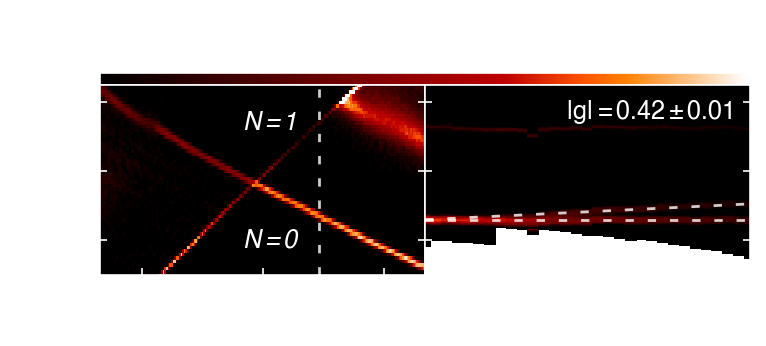

In [257]:
fig = plt.figure(figsize=(8,3.8))
gs3 = gridspec.GridSpec(2, 2, height_ratios = [0.06,1], width_ratios = [1,1], 
                           wspace=0.0, hspace=0.0)

cax = fig.add_subplot(gs3[0,:]) # color bar
ax0 = fig.add_subplot(gs3[1,0]) # coulomb diamond
ax1 = fig.add_subplot(gs3[1,1]) # g factor data

#######################
### coulomb diamond ###
#######################

xmult = [0.01, 0.5] # bias mV, gate 10 mV

swp = dt.open_hdf5(1228, path=data_dir) # load sweep
xx, yy = dt.xy_to_meshgrid(swp['x_array'][:]*0.01, swp['y_array'][:]*0.5)
cond = swp['g_dot2d'][:]*1000

vmin = 0.0; vmid = 3; vmax = 8
midpoint = 1 - np.abs(vmid-vmin)/np.abs(vmax-vmin)
cdmap = dt.shiftedColorMap(plt.cm.gist_heat, midpoint=midpoint, name='shiftedcmap')

im = ax0.pcolormesh(xx, yy, cond, cmap=cdmap, vmin=vmin, vmax=vmax, zorder=-1)
ax0.axvline(x=0.7, color='w', linestyle='--', dashes=(3, 5), alpha=0.8)

ax0.text(-0.25, -608, r'$N=1$', fontstyle='italic')
ax0.text(-0.25, -642, r'$N=0$', fontstyle='italic')

ax0.set_xlabel('V$_{SD}$ (mV)')
ax0.set_xticks([-1.5, 0, 1.5])
ax0.set_ylabel('V$_{p}$ (mV)')
ax0.set_ylim(-650, -595)
ax0.tick_params(axis='both', top=False)

################
### colorbar ###
################

cb = plt.colorbar(cax = cax, mappable = im, orientation = 'horizontal', 
                  ticklocation = 'top')
cb.set_ticks([0,2,4,6,8])
cb.set_ticklabels(['0','','','','8'])
cb.set_label(r'g$_{dot}$ ($10^{-3}e^2$/h)')
cb.ax.tick_params(axis='x', direction='out')

#####################
### g factor data ###
#####################

swp = dt.open_hdf5(1232, path=data_dir) # load sweep
xplt = np.loadtxt(os.path.join(analysis_dir, 'dat1232_xplt.csv'), delimiter=',')
yplt = np.loadtxt(os.path.join(analysis_dir, 'dat1232_yplt.csv'), delimiter=',')
xshift = np.loadtxt(os.path.join(analysis_dir, 'dat1232_xshift.csv'), delimiter=',')
z = swp['g_dot2d'][:]*1000

for i in range(len(z)):
    xx, yy = np.meshgrid(np.array([yplt[i], yplt[i+1]]), 
                             (xplt - xshift[i])+xshift.mean())
    ax1.pcolormesh(xx, yy, z[i,None].transpose(), 
                   cmap=cdmap, vmin=vmin, vmax=vmax, zorder=-1)

ax1.axhline(y=xshift.mean(), c='w', linestyle='--', dashes=(3, 5), alpha=0.8)
fields = np.linspace(0,6, 200)
ax1.plot(fields, G1_OPN*MU_B*fields*1000/ALPHA1_OPN+xshift.mean(), 
             c='w', linestyle='--', dashes=(3, 5), alpha=0.8)

ax1.text(2.6, -605, r'$|g|=0.42 \pm 0.01$')

ax1.set_xlabel('B$_{\parallel}$ (T)')
ax1.set_ylim(-650, -595)
ax1.set_xlim(0, 6)
ax1.set_yticklabels([])
ax1.tick_params(axis='both', top=False)

fig.tight_layout()
fig.savefig(os.path.join(fig_dir, 'transport-spec_01.svg'), bbox_inches='tight')

/usr/local/lib/python3.6/site-packages/matplotlib/mathtext.py:838: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


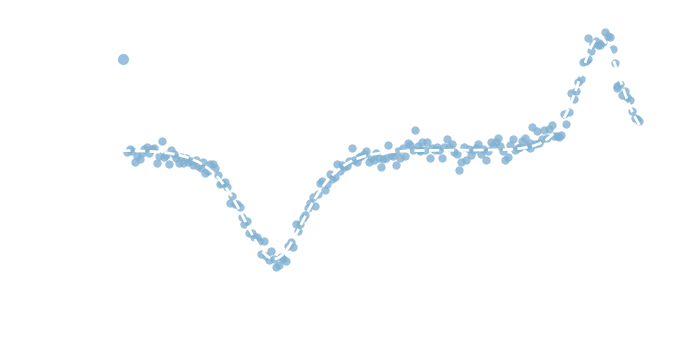

In [265]:
fig, ax2 = plt.subplots(1,1, figsize=(7.2,3.8))

df = pd.read_csv(os.path.join(analysis_dir, 'dat1284-1290_di_free_fits.csv'))
ax2.scatter(df['field'], -1.0*df['epsilon'], 
               marker='o', color='C4', lw=0, alpha = 0.8, zorder=2)

field = np.loadtxt(os.path.join(analysis_dir, 'dat1284-1290_field.csv'), delimiter=',')
dS = np.loadtxt(os.path.join(analysis_dir, 'dat1284-1290_dS12_fit.csv'), delimiter=',')
ax2.plot(field, dS, c='w', ls='--', zorder=3)
ax2.axhline(y=np.log(2), c='w', ls=':', lw=0.8, zorder=1)
ax2.axhline(y=0, c='w', ls=':', lw=0.8, zorder=1)
ax2.axhline(y=-1*np.log(2), c='w', ls=':', lw=0.8, zorder=1)

ax2.set_xlim(-5, 11)
ax2.set_ylim(-0.85, 0.85)

scatter_12 = mpl.lines.Line2D([], [], ls='', 
                               marker='o', color='C4', alpha=0.8, 
                               markeredgewidth=0, markersize=8, 
                               label=r'$1 \rightarrow 2$')
line_12 = mpl.lines.Line2D([], [], color='w', ls='--', 
                               label=r'$fit$')
handles = [scatter_12, line_12]
labels = [h.get_label() for h in handles] 

ax2.legend(handles=handles, labels=labels, bbox_to_anchor=(0.2, 0.9))

ax2.annotate(r'$|g| = {0:.2f}$,'.format(0.467) + '\n' +
    r'$\Delta S(B=0T) / k_B = {0:.2f}$'.format(-1.008*np.log(2)),
            xy=(0.0, -0.5), xycoords='data',
            xytext=(10, 80), textcoords='offset points', fontsize=14, 
            arrowprops=dict(arrowstyle='->', relpos=(0., 0.)))

ax2.annotate(r'$|g| = {0:.2f}$,'.format(0.693) + '\n' + 
    r'$\Delta S(g \mu B=\Delta_{{ST}}) / k_B = {0:.2f}$'.format(1.043*np.log(2)),
            xy=(9.0, 0.5), xycoords='data',
            xytext=(-100, -120), textcoords='offset points', fontsize=14, 
            arrowprops=dict(arrowstyle='->', relpos=(0.6, 0.6)))

ax2.set_yticks([-1*np.log(2), -0.4, 0.0, 0.4, np.log(2)])
ax2.set_yticklabels([r'$-\ln{2}$', '-0.4', '0.0', '0.4', r'$\ln{2}$'])
ax2.set_xticks([-3,0,3,6,9])
ax2.set_ylabel('$\Delta S/k_B$')
ax2.set_xlabel('B$_{\parallel}$ (T)')

fig.tight_layout()
fig.savefig(os.path.join(fig_dir, 'two_fit.svg'), bbox_inches='tight')

/usr/local/lib/python3.6/site-packages/matplotlib/mathtext.py:838: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


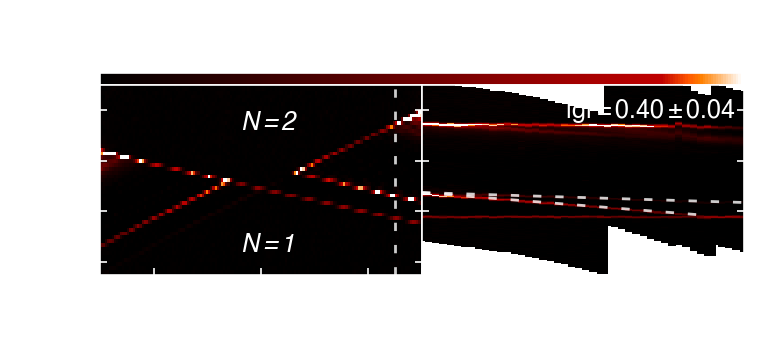

In [309]:
fig = plt.figure(figsize=(8,3.8))
gs3 = gridspec.GridSpec(2, 2, height_ratios = [0.06,1], width_ratios = [1,1], 
                           wspace=0.0, hspace=0.0)

cax = fig.add_subplot(gs3[0,:]) # color bar
ax0 = fig.add_subplot(gs3[1,0]) # coulomb diamond
ax1 = fig.add_subplot(gs3[1,1]) # g factor data

#######################
### coulomb diamond ###
#######################

swp = dt.open_hdf5(1087, path=data_dir) # load sweep
xx, yy = dt.xy_to_meshgrid(swp['x_array'][:]*0.01, swp['y_array'][:]*0.5)
cond = swp['g_dot2d'][:]*1000

vmin = -1; vmid = 1; vmax = 15
midpoint = 1 - np.abs(vmid-vmin)/np.abs(vmax-vmin)
cdmap = dt.shiftedColorMap(plt.cm.gist_heat, midpoint=midpoint, name='shiftedcmap')

im = ax0.pcolormesh(xx, yy, cond, cmap=cdmap, vmin=vmin, vmax=vmax, zorder=-1)
ax0.axvline(x=1.25, color='w', linestyle='--', dashes=(3, 5), alpha=0.8)

ax0.text(-0.2, -668, r'$N=2$', fontstyle='italic')
ax0.text(-0.2, -716, r'$N=1$', fontstyle='italic')

ax0.set_ylim(-725, -650)
ax0.set_yticks([-720, -700, -680, -660])
ax0.set_ylabel('V$_{p}$ (mV)')
ax0.set_xlim(-1.5, 1.5)
ax0.set_xticks([-1.0, 0, 1.0])
ax0.set_xlabel('V$_{SD}$ (mV)')
ax0.tick_params(axis='both', top=False)

####################
### add colorbar ###
####################

cb = plt.colorbar(cax = cax, mappable = im, 
                    orientation = 'horizontal', ticklocation = 'top')
cb.set_ticks([0, 5, 10, 15])
cb.set_ticklabels(['0','','','15'])
cb.set_label(r'g$_{dot}$ ($10^{-3}e^2$/h)')
cb.ax.tick_params(axis='x', direction='out')

##########################
### plot g factor data ###
##########################

df = pd.read_csv(os.path.join(analysis_dir,'dat1082-1084_gfactor_fits.csv'))
dats = [1082, 1083, 1084]
ns = [-5, None, None]
for n, dat in zip(ns, dats):
    # import data
    swp = dt.open_hdf5(dat, path=data_dir) # load sweep
    xplt = np.loadtxt(os.path.join(analysis_dir, 'dat{0:d}_xplt.csv'.format(dat)),
                        delimiter=',')
    yplt = np.loadtxt(os.path.join(analysis_dir, 'dat{0:d}_yplt.csv'.format(dat)),
                        delimiter=',')
    xshift = np.loadtxt(os.path.join(analysis_dir, 'dat{0:d}_xshift.csv'.format(dat)), 
                          delimiter=',')
    z = swp['g_dot2d'][:n]*1000

    for i in range(len(z)):
        xx, yy = np.meshgrid(np.array([yplt[i], yplt[i+1]]), 
                                 (xplt - xshift[i])+df.loc[0,'gate_offset'])
        ax1.pcolormesh(xx, yy, z[i,None].transpose(), 
                       cmap=cdmap, vmin=vmin, vmax=vmax, zorder=-1)
            
fields = np.linspace(0,8, 200)
ax1.plot(fields, df.loc[0,'a0']*fields+df.loc[0,'b0']+df.loc[0,'gate_offset'], 
            c='w', linestyle='--', dashes=(3, 5), alpha=0.8)
fields = np.linspace(0,9, 200)
ax1.plot(fields, df.loc[0,'a1']*fields+df.loc[0,'b1']+df.loc[0,'gate_offset'], 
            c='w', linestyle='--', dashes=(3, 5), alpha=0.8)

ax1.text(4, -663, r'$|g| = 0.40 \pm 0.04$')

ax1.set_xlabel('B$_{\parallel}$ (T)')
ax1.set_xlim(0, 9)
ax1.set_xticks([0, 3, 6, 9])
ax1.set_ylim(-725, -650)
ax1.set_yticks([-720, -700, -680, -660])
ax1.set_yticklabels([])
ax1.tick_params(axis='both', top=False)

fig.tight_layout()
fig.savefig(os.path.join(fig_dir, 'transport-spec_12.svg'), bbox_inches='tight')

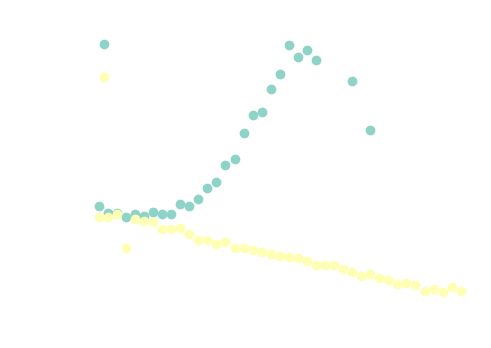

In [428]:
fig, ax = plt.subplots(1,1)

i_open = pd.read_csv(os.path.join(fig_dir,'dat1584_i_open_fits.csv'))
di_open = pd.read_csv(os.path.join(fig_dir,'dat1584_di_open_fits.csv'))
di = pd.read_csv(os.path.join(fig_dir,'dat1584_di_fits.csv'))

ax.scatter(di['source'], -2.0*di['delta'], label='$k_BT$-broadened')
ax.scatter(i_open['source'], di_open['di0']*di_open['gamma']/i_open['i0']*ALPHA1_OPN, 
          label='$h \Gamma$-broadened')
ax.set_ylim(0,2.0)
ax.set_ylabel(r'$\Delta S / k_B$')
ax.set_xticklabels([])
ax.set_xlabel('coupling (arb.)')
ax.legend()
fig.savefig(os.path.join(fig_dir, 'broadening-fits.svg'), bbox_inches='tight')

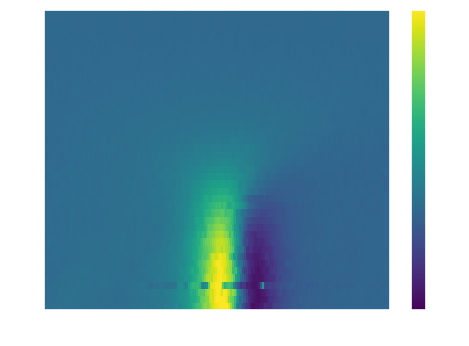

In [432]:
fig, ax = plt.subplots(1,1)

swp = dt.open_hdf5(1584, path=data_dir) 
x = swp['x_array'][:]*0.5
z = swp['g5x2d'][:]*(1e-8)*(1e9)
y = swp['y_array'][:]

# create arrays for plotting
dx = (x[-1] - x[0]) / float(len(x) - 1)
dy = (y[-1] - y[0]) / float(len(y) - 1)
xplt = np.append(x-dx/2.0,x[-1]+dx)
yplt = np.append(y-dy/2.0,y[-1]+dy)
cmap = plt.get_cmap('viridis')
cmap.set_bad('k',0.0)

# create color plot line by line
for i in range(len(z)):
    xtmp = xplt - di_open.loc[i, 'x0']
    ytmp = yplt[i], yplt[i+1]
    xx, yy = np.meshgrid(xtmp, ytmp) # create grid + flip axes
    im = ax.pcolormesh(xx, yy, -1.0*z[i,None], cmap = cmap, vmin=-0.06, vmax=0.12)
    
ax.set_yticklabels([])
ax.set_ylabel('coupling (arb.)')
ax.set_xlim(-6,6)
cb = plt.colorbar(im)
cb.set_ticks([])
cb.set_label('$\delta g$ (arb.)', labelpad=24, rotation=-90)
fig.tight_layout()
fig.savefig(os.path.join(fig_dir, 'peak-broadened.png'), dpi=600, bbox_inches='tight')